# Problem Statement

## Which the best store to by an item from KSA 🇸🇦

### there is to way to get the data form website , 
- use API 
- use Webscraping way (if there's not API for the website), which we use it here

In [80]:
# install python library for Persian language localization.
# !pip install persian 

In [6]:
# imporitng all library we need it 
import re
from scrapy.selector import Selector
import requests
import pandas as pd
from bs4 import BeautifulSoup
from time import sleep
from selenium import webdriver
# import persian
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Danube Market

In [87]:
## Step 1 : Download Html page 
#open browser
driver = webdriver.Chrome(executable_path='./chromedriver/chromedriver')

#requesr url
url = 'https://danube.sa/departments/grocery?hierarchicalMenu%5Btaxons_ar.lvl0%5D%5B0%5D=%D9%85%D9%86%20%D8%A7%D9%84%D8%A3%D9%82%D8%B3%D8%A7%D9%85&hierarchicalMenu%5Btaxons_ar.lvl0%5D%5B1%5D=%D8%A7%D9%84%D8%A7%D8%AD%D8%AA%D9%8A%D8%A7%D8%AC%D8%A7%D8%AA%20%D8%A7%D9%84%D9%8A%D9%88%D9%85%D9%8A%D8%A9'
product_name_list = []
price_lst = []
converter_price = [x for x in range(0,10)]

driver.get(url)

for page in range(1,50):
    driver.get(url+'&page={}'.format(page))
    sleep_time = 4
    sleep(2)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
   
    item_lst = None
    while item_lst == None:
        sleep(sleep_time)
        HTML = driver.page_source
        soup = BeautifulSoup(HTML,"html.parser")
        HTML = soup.prettify("utf-8")
        item_lst = soup.findAll('div', attrs ={'class': 'product-box'})
        for section in item_lst: 
            product_name_list.append(section.find('div', attrs={'class': 'product-box__name'}).text.strip()) 
            price = section.find('div', attrs={'class':'product-price__current-price'}).text  
            # convert the price from arbics number to english numbers and to float
            price_lst.append(float(re.search(r'[\d\.]+',price).group()))

driver.close()

In [88]:
# section.find('div', attrs={'class':'product-price__current-price'}).text

### Save the out put in Data frame

In [125]:
#save the out put in Data frame
danubeـdf = pd.DataFrame({'product_name_list': product_name_list, 'price_lst': price_lst})

### investigate data

In [113]:
danubeـdf.head()

,product_name_list,price_lst
0,نوفا - مياه معبأة ٣٣٠ مل ٤٠ عبوة,18.0
1,شركة مطاحن الدقيق والمخابز الكويتية طحين فاخر ...,3.0
2,التنمية - صدور دجاج بدون عظم طازجة ٤٥٠ غرام,14.0
3,بيرين - مياة شرب ٤٠*٣٣٠ مل,18.0
4,اليوم - فيليه صدور الدجاج ١٠٠٠ غرام,39.0


In [91]:
danubeـdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 2 columns):
product_name_list    980 non-null object
price_lst            980 non-null float64
dtypes: float64(1), object(1)
memory usage: 15.4+ KB


In [96]:
danubeـdf.describe()

,price_lst
count,980.000000
mean,12.477551
std,12.476352
min,0.000000
25%,4.000000
50%,9.000000
75%,16.000000
max,132.000000


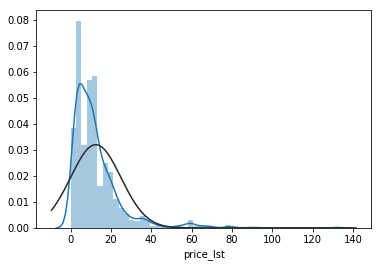

In [109]:
sns.distplot(danubeـdf.price_lst, bins= 50, fit=norm);

In [107]:
# avg_price = danubeـdf[danubeـdf.price_lst < 60]

In [114]:
# sns.distplot(avg_price, bins= 75, fit=norm);

### Save data frame as a csv file

In [84]:
danubeـdf.to_csv('Danube.csv', encoding='utf-8-sig')

# Carrefour Market 

In [7]:
driver = webdriver.Chrome(executable_path='./chromedriver/chromedriver')
# driver.implicitly_wait(30)
# driver.maximize_window()

#requesr url
url ='https://www.carrefourksa.com/mafsau/ar/-/c/FKSA1000000'
product_name_list_carrefour = []
price_lst_carrefour = [] 
driver.get(url)

for page in range(1,48):
    driver.get(url+'?&qsort=relevance&pg={}'.format(page))
    sleep_time = 4
    sleep(2)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
   
    item_lst_carrefour = None
    while item_lst_carrefour == None:
        sleep(sleep_time)
        HTML = driver.page_source
        soup = BeautifulSoup(HTML,"html.parser")
        HTML = soup.prettify("utf-8")
        item_lst_carrefour = soup.findAll('div', attrs ={'class': 'comp-productcard'})
        for section in item_lst_carrefour: 
            product_name_list_carrefour.append(section.find('p', attrs={'class': 'comp-productcard__name'}).text.strip())
#             price = section.find('p', attrs={'class':'comp-productcard__price'}).text  
#             price_lst_carrefour.append(float(re.search(r'[\d\.]+',price).group()))
            price_lst_carrefour.append(section.find('p', attrs={'class':'comp-productcard__price'}).text.strip())  
#             try:
#                 price_lst.append(section.select('*[@id="main"]/div[2]/div[1]/div/div[2]/section/div[3]/div/div/div[1]/div/p[1]/del').text.strip())
#             except:
#                  price_lst.append(section.select('*[@id="main"]/div[2]/div[1]/div/div[2]/section/div[4]/div/div/div[1]/div/p[1]/strong').txt.strip())   
driver.close()

In [8]:
# section.find_element_by_xpath('//*[@id="main"]/div[2]/div[1]/div/div[2]/section/div[3]/div/div/div[1]/div/p[1]/del')
# section.select('//*[@id="main"]/div[2]/div[1]/div/div[2]/section/div[3]/div/div/div[1]/div/p[1]/del').text.strip()

### Save the out put in Data frame

In [5]:
carrefour_df = pd.DataFrame({'product_name_list': product_name_list_carrefour, 'price_lst': price_lst_carrefour})
# df_carrefour.to_csv('Carrefour.csv', encoding='utf-8-sig')

NameError: name 'product_name_list_carrefour' is not defined

### investigate data

In [147]:
carrefour_df.tail()

,product_name_list,price_lst
5560,تريتو دونات كيك بالكريمة الكرمل 50 جرام ...,12.95
5561,تريتو مارمو كيك بالشوكولاتة 40 جرام 12 ح...,12.95
5562,الصافي زبادي يوناني بالفراولة 160 جرام,4.00
5563,كيلوجز اول بران رقائق الافطار 375 جم,21.95
5564,"ايفيان مياه معدنية 1,25 لتر - 12",148.00


In [135]:
carrefour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 2 columns):
product_name_list    5565 non-null object
price_lst            5565 non-null object
dtypes: object(2)
memory usage: 87.0+ KB


In [137]:
# to get just the actuall price and change the type to float 
carrefour_df['price_lst'] = carrefour_df.price_lst.apply(lambda x:re.findall(r'\d+\.\d+', x)[1] if len(re.findall(r'\d+\.\d+', x)) > 1 else re.findall(r'\d+\.\d+', x)[0]).astype(float)

In [138]:
carrefour_df.head()

,product_name_list,price_lst
0,العلالي فانيلا بودرة 20 جرام,2.50
1,حدائق كاليفورنيا فول مدمس مصفى 450غ,4.95
2,امريكانا بتر كوكيز ازرق 44 جرام,1.25
3,اندوفود صلصة حارة سومطرا 140 مل,3.50
4,مازولا سمن نباتي للكيك 1 كيلو,16.75


In [139]:
carrefour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 2 columns):
product_name_list    5565 non-null object
price_lst            5565 non-null float64
dtypes: float64(1), object(1)
memory usage: 87.0+ KB


In [148]:
carrefour_df.describe()

,price_lst
count,5565.000000
mean,16.501058
std,23.455627
min,0.500000
25%,5.950000
50%,11.750000
75%,19.500000
max,650.000000


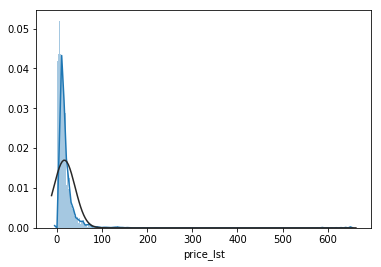

In [146]:
sns.distplot(carrefour_df.price_lst, bins= 300, fit=norm);

### Save data frame as a csv file

In [9]:
carrefour_df.to_csv('Carrefour.csv', encoding='utf-8-sig')

NameError: name 'carrefour_df' is not defined